In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(1)

In [2]:
max_len = 5

def generate_segment(start_x: int, end_x: int, start_y: int = 0, end_y: int = 50):
    first_x, first_y = start_x + (end_x - start_x) * random.random(), start_y + (end_y - start_y) * random.random()
    end_x = first_x + max_len * random.random()
    end_y = first_y + (max_len**2 - (end_x - first_x)**2)**(0.5) * random.choice((-1, 1))
    return first_x, first_y, end_x, end_y


def generate_segments(num_segments: int, num_ranges: int,
                      start_x: int = 0, start_y: int = 0,
                      end_x: int = 100, end_y: int = 50):
    x_ratio = end_x - start_x
    segments = []

    range_len = x_ratio // num_ranges

    borders_non_overlapping = [start_x + ind * range_len for ind in range(num_ranges)] + [end_x]
    borders_overlapping = [start_x + range_len // 2 + ind * range_len for ind in range(num_ranges)]
    for ind in range(num_ranges):
        segments.extend([generate_segment(borders_non_overlapping[ind], borders_non_overlapping[ind + 1]) for seg in range(num_segments)])


    for ind in range(num_ranges - 1):
        segments.extend([generate_segment(borders_overlapping[ind], borders_overlapping[ind + 1]) for seg in range(num_segments)])

    return segments

In [3]:
def visualize_segments(segments: list):
    fig = plt.figure(figsize=(20, 10))
    for segment in segments:
        plt.plot((segment[0], segment[2]), (segment[1], segment[3]), linestyle="-")

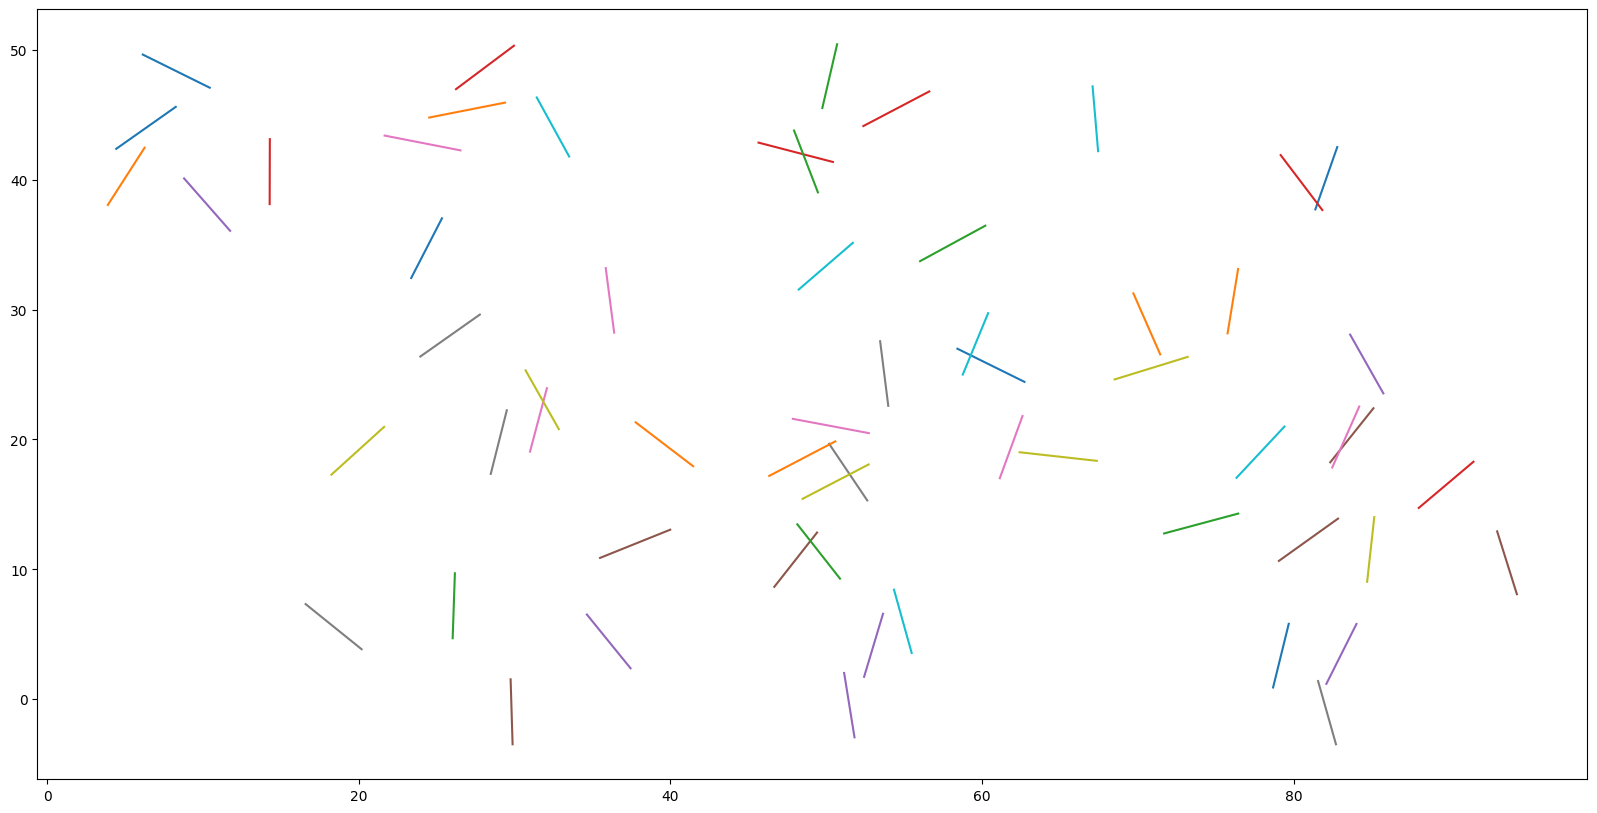

In [4]:
segments = generate_segments(12, 3)
visualize_segments(segments)

In [5]:
def to_cpp_code(segments):
    code_str = 'std::vector<Segment> segments = {'
    offset_len = len(code_str)
    is_first = True
    for segment in segments:
        segment_str = (' ' * offset_len if not is_first else '') + f'Segment(Point({segment[0]}, {segment[1]}), Point({segment[2]}, {segment[3]})),\n'
        code_str += segment_str
        is_first = False
    code_str = code_str[:-2] + '};'
    return code_str

In [6]:
print(to_cpp_code(segments))

std::vector<Segment> segments = {Segment(Point(4.43402005570924, 42.371686846861635), Point(8.25289315059231, 45.59910195576507)),
                                 Segment(Point(3.8913172211450147, 38.04812224562878), Point(6.252543439025597, 42.455458260501416)),
                                 Segment(Point(26.027870587471934, 4.692979338711744), Point(26.169607970081966, 9.690969986399159)),
                                 Segment(Point(14.281313240866762, 38.1140041228971), Point(14.291843507622316, 43.11399303423301)),
                                 Segment(Point(8.788908495089565, 40.09131834982418), Point(11.744675670096084, 36.05852274290905)),
                                 Segment(Point(29.747106101178957, 1.5294991516776768), Point(29.874335406146262, -3.468881856604658)),
                                 Segment(Point(30.991922371690848, 19.06021188441062), Point(32.074919357343916, 23.941514736013495)),
                                 Segment(Point(23.95313584773500